In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
def norm(x):
    x = np.array(x)
    return x/np.max(x)

# Plotting

problem here right now is that the count data is not in fact lining up with the cos^2 distribution at all, but it is mostly with the first data point.

In [ ]:
# for 30 min intervals
#counts = norm([56,35,33,30,21,7,3]) # Real Data
counts = norm([37,35,33,30,21,7,3]) # fake Data
angle = np.deg2rad([0,15,20,35,50,65,85])

In [39]:
ang = np.deg2rad(15)
np.cos(ang)**2*max([56,33,30,21,7,3])

np.float64(52.248711305964285)

In [40]:
x = np.linspace(0,np.pi/2,20)
y = np.cos(x)**3

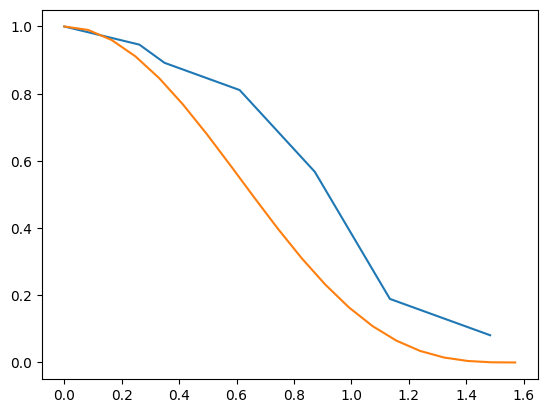

In [41]:
plt.figure()
plt.plot(angle,counts)
plt.plot(x,y)
plt.show()

In [42]:
u1 = np.random.rand(500)*3

In [43]:
def f(x):
    return x**2

In [44]:
np.mean(f(u1)*3)

np.float64(8.897555860372854)